In [1]:
import pandas as pd
import tushare as ts
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Adopts the top 6 stocks in the SSE 50 Index as the underlying assets, which are: 
Ping An (600318), China Merchants Bank (600036), Kweichow Moutai (600519), Industrial Bank (601166), Minsheng Bank (600016) and Bank of Communications (601328).

In [62]:
stock_codes = ['600318', '600036', '600519', '601166','600016','601328']
all_codes = ['600318', '600036', '600519', '601166','600016','601328','sz50']#contains sz50 index
num_stocks = len(stock_codes)
num_stocks

6

In [63]:
# initiate daily dataframe
stock_daily_quotes = {}

In [64]:
for code in all_codes:
    print(code)
    df = ts.get_k_data(code=code, start='2015-01-01', end='2020-12-31') # for total 6 years
    df = df.set_index(['date'])
    df[code] = df['close']
    stock_daily_quotes[code] = df[code]

600318
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
600036
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
600519
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
601166
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
600016
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
601328
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2
sz50
本接口即将停止更新，请尽快使用Pro版接口：https://waditu.com/document/2


In [65]:
stock_daily_quotes

{'600318': date
 2015-02-06     6.109
 2015-02-09     6.719
 2015-02-10     7.393
 2015-02-11     8.132
 2015-02-12     8.945
                ...  
 2020-12-25     9.490
 2020-12-28     9.390
 2020-12-29     9.700
 2020-12-30     9.800
 2020-12-31    10.240
 Name: 600318, Length: 1020, dtype: float64,
 '600036': date
 2015-01-05    14.473
 2015-01-06    14.248
 2015-01-07    14.022
 2015-01-08    13.510
 2015-01-09    13.632
                ...  
 2020-12-25    42.720
 2020-12-28    43.040
 2020-12-29    42.830
 2020-12-30    43.050
 2020-12-31    43.950
 Name: 600036, Length: 1457, dtype: float64,
 '600519': date
 2015-01-05     172.013
 2015-01-06     168.029
 2015-01-07     163.876
 2015-01-08     162.874
 2015-01-09     161.642
                 ...   
 2020-12-25    1830.000
 2020-12-28    1873.000
 2020-12-29    1867.000
 2020-12-30    1933.000
 2020-12-31    1998.000
 Name: 600519, Length: 1462, dtype: float64,
 '601166': date
 2015-01-05    14.570
 2015-01-06    14.673
 2015-01-

In [66]:
final_df = pd.concat([value for _, value in stock_daily_quotes.items()], axis = 1) #axis=1 row alignment
final_df.head()

,600318,600036,600519,601166,600016,601328,sz50
date,,,,,,,
2015-02-06,6.109,12.365,148.299,12.134,6.857,4.938,2325.24
2015-02-09,6.719,12.504,156.537,12.195,6.985,5.047,2366.77
2015-02-10,7.393,12.721,155.331,12.411,7.053,5.148,2403.55
2015-02-11,8.132,12.703,155.561,12.359,7.069,5.122,2415.13
2015-02-12,8.945,12.642,155.917,12.134,7.031,5.114,2416.45


In [67]:
final_df = final_df.dropna() #To clean the data
final_df

,600318,600036,600519,601166,600016,601328,sz50
date,,,,,,,
2015-02-06,6.109,12.365,148.299,12.134,6.857,4.938,2325.24
2015-02-09,6.719,12.504,156.537,12.195,6.985,5.047,2366.77
2015-02-10,7.393,12.721,155.331,12.411,7.053,5.148,2403.55
2015-02-11,8.132,12.703,155.561,12.359,7.069,5.122,2415.13
2015-02-12,8.945,12.642,155.917,12.134,7.031,5.114,2416.45
...,...,...,...,...,...,...,...
2020-12-25,9.490,42.720,1830.000,20.210,5.180,4.450,3512.49
2020-12-28,9.390,43.040,1873.000,20.490,5.160,4.450,3523.84
2020-12-29,9.700,42.830,1867.000,20.630,5.160,4.460,3517.35


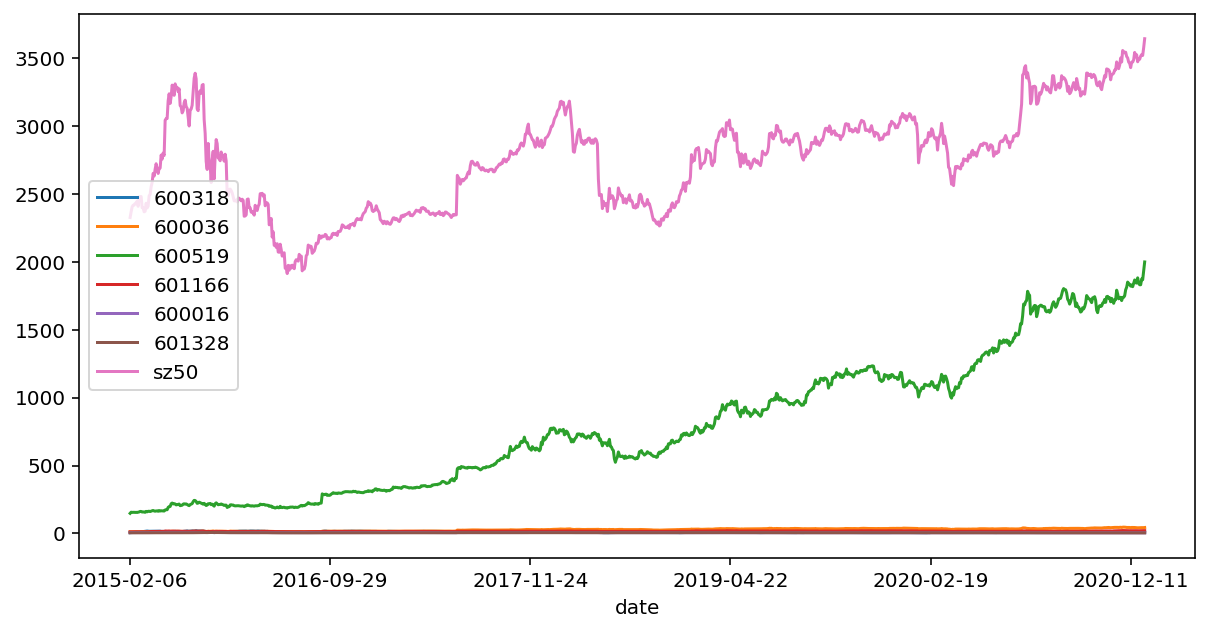

In [68]:
final_df.plot(figsize=(10,5))

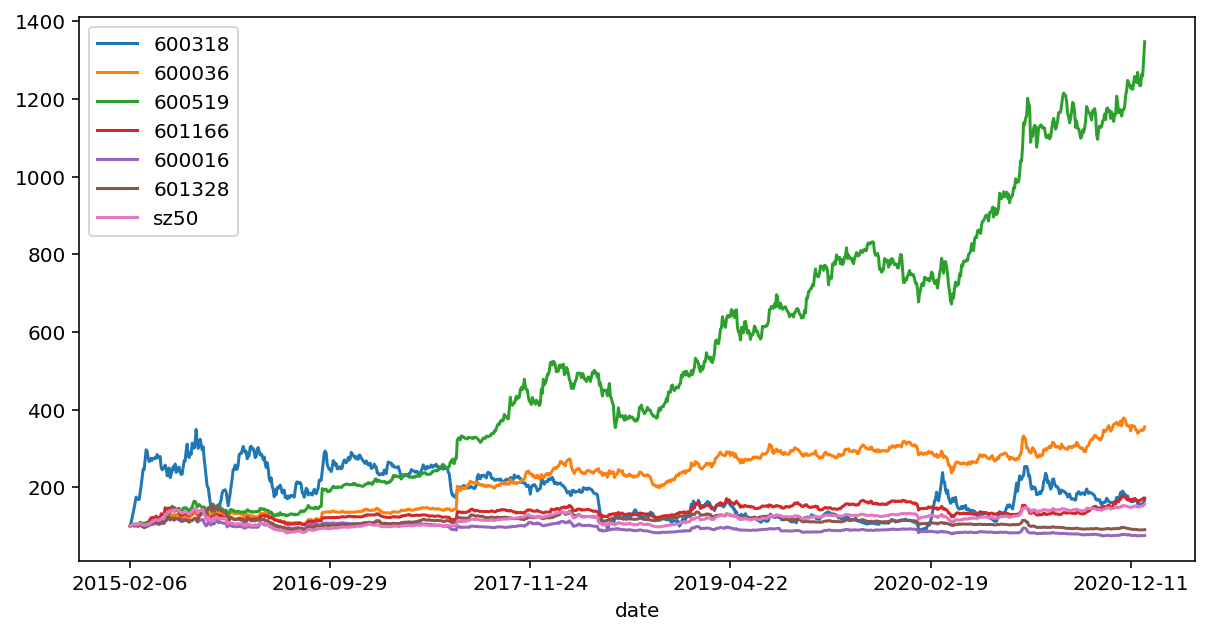

In [69]:
(final_df/final_df.iloc[0]*100).plot(figsize=(10,5)) #Time series price data after specification

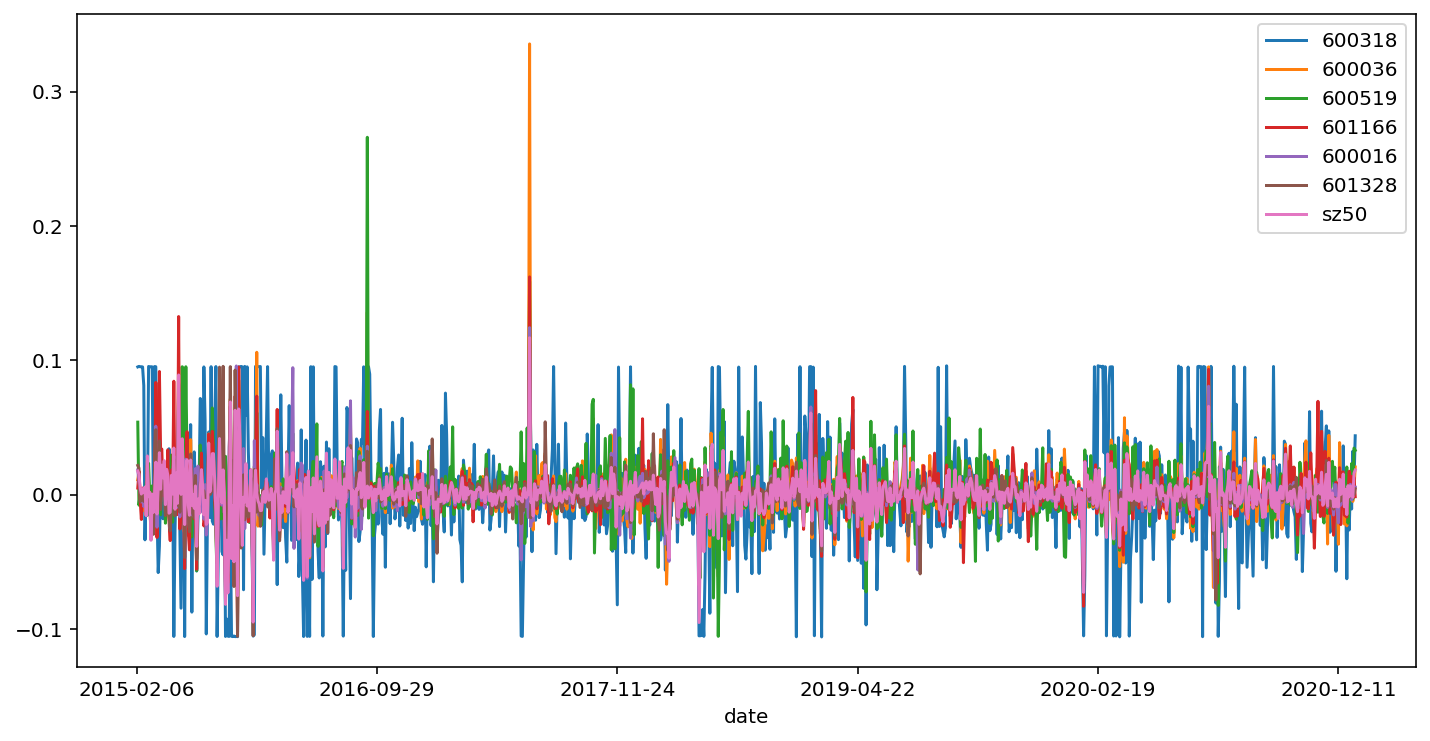

In [70]:
(np.log(final_df/final_df.shift(1))).plot(figsize=(12,6)) #log daily return

In [71]:
logrtn_df = np.log(final_df/final_df.shift(1))
logrtn_df

,600318,600036,600519,601166,600016,601328,sz50
date,,,,,,,
2015-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-09,0.095176,0.011179,0.054062,0.005015,0.018495,0.021834,0.017703
2015-02-10,0.095594,0.017206,-0.007734,0.017557,0.009688,0.019814,0.015421
2015-02-11,0.095273,-0.001416,0.001480,-0.004199,0.002266,-0.005063,0.004806
2015-02-12,0.095288,-0.004814,0.002286,-0.018373,-0.005390,-0.001563,0.000546
...,...,...,...,...,...,...,...
2020-12-25,0.008466,0.003517,-0.000186,0.001981,0.007752,0.002250,0.006633
2020-12-28,-0.010593,0.007463,0.023225,0.013759,-0.003868,0.000000,0.003226
2020-12-29,0.032481,-0.004891,-0.003209,0.006809,0.000000,0.002245,-0.001843


### Normality test: Markowitz's portfolio theory needs to meet the normal distribution of returns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001446C034F10>,
      dtype=object)

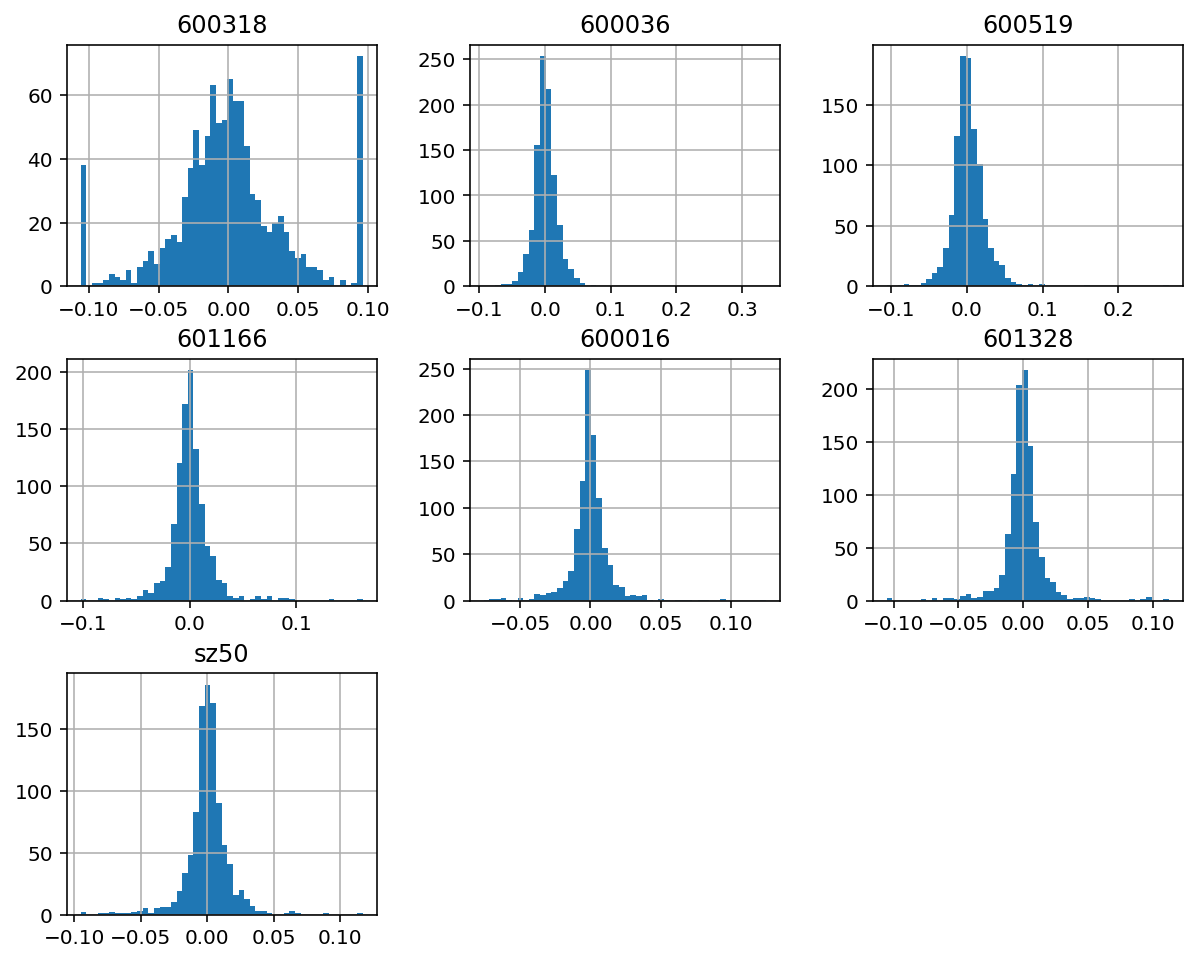

In [72]:
# Draw a histogram
logrtn_df.hist(bins = 50, figsize = (10,8))

##### Output statistics for each stock
Define the print_statistics function in a more understandable way

Output statistics such as the mean, skewness, or kurtosis of a given (historical or simulated) dataset

In [73]:
import statsmodels.api as sm
import scipy.stats as scs
def print_statistics(array):
    sta = scs.describe(array)
    print ('%14s %15s' %('statistic','value'))
    print (30*'-')
    print ('%14s %15d' %('size', sta[0]))
    print ('%14s %15.5f' %('min', sta[1][0]))
    print ('%14s %15.5f' %('max', sta[1][1]))
    print ('%14s %15.5f' %('mean', sta[2]))
    print ('%14s %15.5f' %('std', np.sqrt(sta[3])))
    print ('%14s %15.5f' %('skew', sta[4]))
    print ('%14s %15.5f' %('kurtosis', sta[5]))

for st in all_codes:
    print ('\nResults for stock %s' %st)
    print (30*'-')
    log_data = np.array(logrtn_df[st].dropna())
    print_statistics(log_data)


Results for stock 600318
------------------------------
     statistic           value
------------------------------
          size            1014
           min        -0.10581
           max         0.09604
          mean         0.00051
           std         0.04268
          skew         0.10718
      kurtosis         0.83568

Results for stock 600036
------------------------------
     statistic           value
------------------------------
          size            1014
           min        -0.09328
           max         0.33556
          mean         0.00125
           std         0.02184
          skew         3.93475
      kurtosis        56.36943

Results for stock 600519
------------------------------
     statistic           value
------------------------------
          size            1014
           min        -0.10536
           max         0.26608
          mean         0.00256
           std         0.02288
          skew         1.90082
      kurtosis        2

In [74]:
def normality_test(array):
    '''
    对给定的数据集进行正态性检验
    组合了3中统计学测试
    偏度测试（Skewtest）——足够接近0
    峰度测试（Kurtosistest)——足够接近3
    正态性测试
    '''
    print  ('Skew of data set %15.3f' % scs.skew(array))
    print  ('Skew test p-value %14.3f' % scs.skewtest(array)[1])
    print  ('Kurt of data set %15.3f' % scs.kurtosis(array))
    print  ('Kurt test p-value %14.3f' % scs.kurtosistest(array)[1])
    print  ('Norm test p-value %14.3f' % scs.normaltest(array)[1])

for st in all_codes:
    print ('Results for st:',st)
    print (32*'-')
    log_data = np.array(logrtn_df[st].dropna())
    normality_test(log_data)

Results for st: 600318
--------------------------------
Skew of data set           0.107
Skew test p-value          0.162
Kurt of data set           0.836
Kurt test p-value          0.000
Norm test p-value          0.000
Results for st: 600036
--------------------------------
Skew of data set           3.935
Skew test p-value          0.000
Kurt of data set          56.369
Kurt test p-value          0.000
Norm test p-value          0.000
Results for st: 600519
--------------------------------
Skew of data set           1.901
Skew test p-value          0.000
Kurt of data set          20.502
Kurt test p-value          0.000
Norm test p-value          0.000
Results for st: 601166
--------------------------------
Skew of data set           1.199
Skew test p-value          0.000
Kurt of data set          11.459
Kurt test p-value          0.000
Norm test p-value          0.000
Results for st: 600016
--------------------------------
Skew of data set           0.778
Skew test p-value          

##### Conclusions:
From the perspective of skewness coefficient, the return on assets of the six stocks all presented a right skewness distribution, while the return on SSE 50 index presented a left skewness distribution, and extreme losses occurred. 

From the kurtosis coefficient, except 600318, all of them are greater than 3, indicating that the distribution of its return rate is characterized by thick tail.

The test assumption is that the data set is normally distributed. This shows that the normal assumption of stock market returns is valid.

## First Part: Mean-Variance Optimization:
Markowitz Method + Monte carlo

In [80]:
returns = logrtn_df.iloc[:,0:6]
mean = returns.mean()
mean

600318    0.000509
600036    0.001251
600519    0.002565
601166    0.000535
600016   -0.000273
601328   -0.000096
dtype: float64

In [82]:
cov = returns.cov()
cov

,600318,600036,600519,601166,600016,601328
600318,0.001821,0.000221,0.000228,0.000225,0.000137,0.000151
600036,0.000221,0.000477,0.000270,0.000329,0.000239,0.000238
600519,0.000228,0.000270,0.000523,0.000198,0.000133,0.000136
601166,0.000225,0.000329,0.000198,0.000371,0.000224,0.000232
600016,0.000137,0.000239,0.000133,0.000224,0.000235,0.000186
601328,0.000151,0.000238,0.000136,0.000232,0.000186,0.000245


##### Monte Carlo

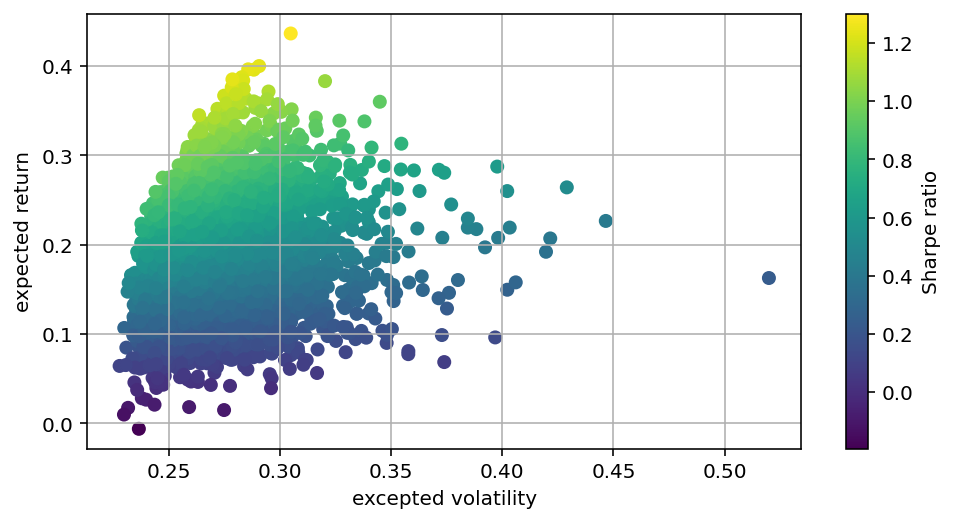

In [87]:
port_returns = []
port_variance = []
for p in range(4000):
    weights = np.random.random(num_stocks)
    weights /=np.sum(weights)
    port_returns.append(np.sum(mean*252*weights))
    port_variance.append(np.sqrt(np.dot(weights.T, np.dot(cov*252, weights))))

port_returns = np.array(port_returns)
port_variance = np.array(port_variance)

# risk free risk is assumed to 4%
risk_free = 0.04
plt.figure(figsize = (8,4))
plt.scatter(port_variance, port_returns, c=(port_returns-risk_free)/port_variance, marker = 'o')
plt.grid(True)
plt.xlabel('excepted volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')

##### 1.Optimize by: maximize Sharp ratio

In [113]:
def statistics(weights):
    weights = np.array(weights)
    port_returns = np.sum(mean*weights)*252
    port_variance = np.sqrt(np.dot(weights.T, np.dot(cov*252,weights)))
    return np.array([port_returns, port_variance, port_returns/port_variance])

# constraint optimization problem:
import scipy.optimize as sco

# max sharp ratio = min -sharp ratio
def min_sharpe(weights):
    return -statistics(weights)[2]

# constraint is sum of weights equalled to 1:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

# We also limit parameter values (weights) to between 0 and 1. 
# These values are provided to the minimization function as a single tuple of multiple tuples
bnds = tuple((0,1) for x in range(num_stocks))

# The only input ignored in an optimization function call is the starting parameter list (the initial guess of the weight). 
# Let's simply use the average distribution.
opts = sco.minimize(min_sharpe, num_stocks*[1./num_stocks,], method = 'SLSQP', bounds = bnds, constraints = cons)
opts

     fun: -1.7797952506591501
     jac: array([ 4.21210542e-01,  5.16013354e-02, -1.49011612e-08,  3.01049873e-01,
        6.41196147e-01,  5.29814601e-01])
 message: 'Optimization terminated successfully'
    nfev: 14
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 3.05311332e-16,
       0.00000000e+00, 0.00000000e+00])

In [114]:
# optimal weights:
opts['x'].round(3)

array([0., 0., 1., 0., 0., 0.])

In [115]:
# Expected return, expected volatility, sharp ratio
statistics(opts['x']).round(5)

array([0.64632, 0.36314, 1.7798 ])

##### 2. Optimize by: minimize variance

In [116]:
def min_variance(weights):
    return statistics(weights)[1]

optv = sco.minimize(min_variance, num_stocks*[1./num_stocks,],method = 'SLSQP', bounds = bnds, constraints = cons)
optv

     fun: 0.22364900170374583
     jac: array([0.22387278, 0.27389343, 0.22328121, 0.25083264, 0.22375212,
       0.22366375])
 message: 'Optimization terminated successfully'
    nfev: 77
     nit: 11
    njev: 11
  status: 0
 success: True
       x: array([2.51572865e-02, 0.00000000e+00, 1.58057142e-01, 2.93954314e-17,
       4.57813610e-01, 3.58971962e-01])

In [117]:
# optimal weights:
optv['x'].round(3)

array([0.025, 0.   , 0.158, 0.   , 0.458, 0.359])

In [118]:
# Expected return, expected volatility, sharp ratio
statistics(optv['x']).round(5)

array([0.06523, 0.22365, 0.29166])

##### Efficient Frontier

In [119]:
def min_variance(weights):
    return statistics(weights)[1]

#different target_returns
target_returns = np.linspace(0.0,0.5,50)
target_variance = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num_stocks*[1./num_stocks,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_variance.append(res['fun'])

target_variance = np.array(target_variance)

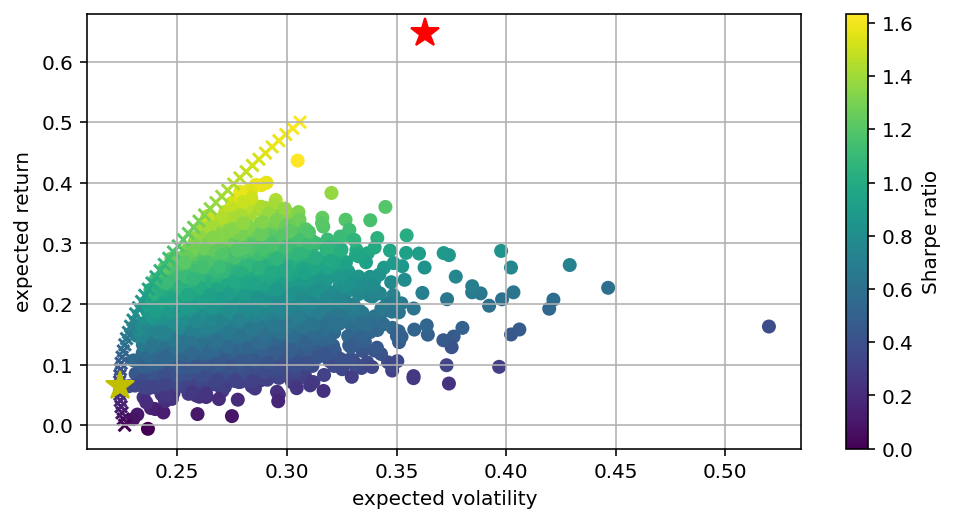

In [120]:
plt.figure(figsize = (8,4))
#Circle: Monte Carlo randomly generated combination distribution
plt.scatter(port_variance, port_returns, c = port_returns/port_variance,marker = 'o')
#Cross: Valid Efficient Frontier
plt.scatter(target_variance,target_returns, c = target_returns/target_variance, marker = 'x')
#Red star: Marks the highest Sharpe combination
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0], 'r*', markersize = 15.0)
#Yellow star: Marks the combination of minimum variance
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0], 'y*', markersize = 15.0)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label = 'Sharpe ratio')

### Second Part: Mean-CoVaR

##### 1.Historical Method

In [122]:
paymentsLocal = np.array([100000, 100000, 100000, 100000, 100000, 100000]) 
returns = returns.dropna()
def createHistoricalSimulation(returns, payments):
    return payments.dot(returns)

histSimulation = np.array([createHistoricalSimulation(np.array(returns.iloc[i, :]), paymentsLocal) for i in range(returns.shape[0])])
histSimulation

array([20576.00131352, 15212.52631875,  8834.0951294 , ...,
        3343.49438467,  6505.92159947, 10650.68867728])

In [130]:
def tabulateData(values, conf_levels):
    table = [[('{0}%'.format((1-conf_levels[i])*100)), values[i]] for i in range(len(conf_levels))]
    print(table)

In [131]:
conf_levels = [0.10, 0.05, 0.01]
# histVaRs
histVaRs = [abs(np.percentile(histSimulation, conf_level * 100)) for conf_level in conf_levels]
tabulateData(histVaRs, conf_levels)

print('\n')

#CVaRs
histCVaRs = [abs(np.mean(histSimulation[histSimulation < np.percentile(histSimulation, conf_level * 100)])) for conf_level in conf_levels]
tabulateData(histCVaRs, conf_levels)

[['90.0%', 8832.708744081925], ['95.0%', 13317.966670300884], ['99.0%', 28814.754248830755]]


[['90.0%', 17049.22731589437], ['95.0%', 23346.71413926049], ['99.0%', 36932.98738424479]]


In [132]:
conf_level = 0.05
def statistics_CVaR(weights):
    weights = np.array(weights)
    port_returns = np.sum(mean*weights)*252
    histSimulation = np.array([createHistoricalSimulation(np.array(returns.iloc[i, :]), weights) 
                               for i in range(returns.shape[0])])
    histCVaRs = abs(np.mean(histSimulation[histSimulation < np.percentile(histSimulation, conf_level * 100)]))
    port_CVaR = histCVaRs
    return np.array([port_returns, port_CVaR])

# constraint optimization problem:
import scipy.optimize as sco

# min_CVaR
def min_CVaR(weights):
    return statistics_CVaR(weights)[1]

# constraint is sum of weights equalled to 1:
cons = ({'type':'eq', 'fun':lambda x: np.sum(x)-1})

# We also limit parameter values (weights) to between 0 and 1. 
# These values are provided to the minimization function as a single tuple of multiple tuples
bnds = tuple((0,1) for x in range(num_stocks))

# The only input ignored in an optimization function call is the starting parameter list (the initial guess of the weight). 
# Let's simply use the average distribution.
optC = sco.minimize(min_CVaR, num_stocks*[1./num_stocks,], method = 'SLSQP', bounds = bnds, constraints = cons)
optC

     fun: 0.03245680235250445
     jac: array([0.05274717, 0.03219271, 0.03216315, 0.03249602, 0.03289209,
       0.0319967 ])
 message: 'Optimization terminated successfully'
    nfev: 153
     nit: 21
    njev: 21
  status: 0
 success: True
       x: array([3.07331916e-17, 3.44682199e-02, 3.17508141e-01, 1.55778112e-03,
       4.46422509e-01, 2.00043349e-01])

In [133]:
# optimal weights:
optC['x'].round(3)

array([0.   , 0.034, 0.318, 0.002, 0.446, 0.2  ])

In [134]:
# Expected return, expected volatility, sharp ratio
statistics_CVaR(optC['x']).round(5)

array([0.18076, 0.03246])

##### 2.Monte Carlo

In [140]:
#different target_returns
target_returns = np.linspace(0.0,0.5,50)
target_CVaR = []
bnds = tuple((0,1) for x in range(num_stocks))
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics_CVaR(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_CVaR, num_stocks*[1./num_stocks,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_CVaR.append(res['fun'])

target_CVaR = np.array(target_CVaR)

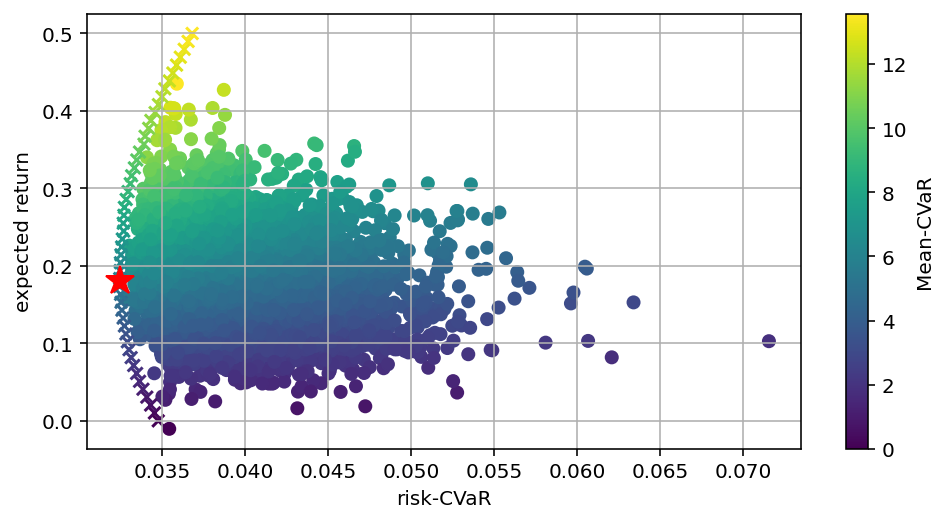

In [141]:
port_returns = []
port_CVaR = []
for p in range(4000):
    weights = np.random.random(num_stocks)
    weights /=np.sum(weights)
    port_returns.append(np.sum(mean*252*weights))
    port_CVaR.append(statistics_CVaR(weights)[1])

port_returns = np.array(port_returns)
port_CVaR = np.array(port_CVaR)
plt.figure(figsize = (8,4))
#Circle: Monte Carlo randomly generxated combination distribution
plt.scatter(port_CVaR, port_returns, c = port_returns/port_CVaR,marker = 'o')
#Cross: Valid Efficient Frontier
plt.scatter(target_CVaR,target_returns, c = target_returns/target_CVaR, marker = 'x')
#Red star: Marks the highest Sharpe combination
plt.plot(statistics_CVaR(optC['x'])[1], statistics_CVaR(optC['x'])[0], 'r*', markersize = 15.0)
plt.grid(True)
plt.xlabel('risk-CVaR')
plt.ylabel('expected return')
plt.colorbar(label = 'Mean-CVaR')

In [150]:
target_returns = np.linspace(0.0,0.5,50)
target_CVaR_var = []
for tar in target_returns:
    cons = ({'type':'eq','fun':lambda x:statistics(x)[0]-tar},{'type':'eq','fun':lambda x:np.sum(x)-1})
    res = sco.minimize(min_variance, num_stocks*[1./num_stocks,],method = 'SLSQP', bounds = bnds, constraints = cons)
    target_CVaR_var.append(min_CVaR(res['x']))

target_CVaR_var = np.array(target_CVaR_var)

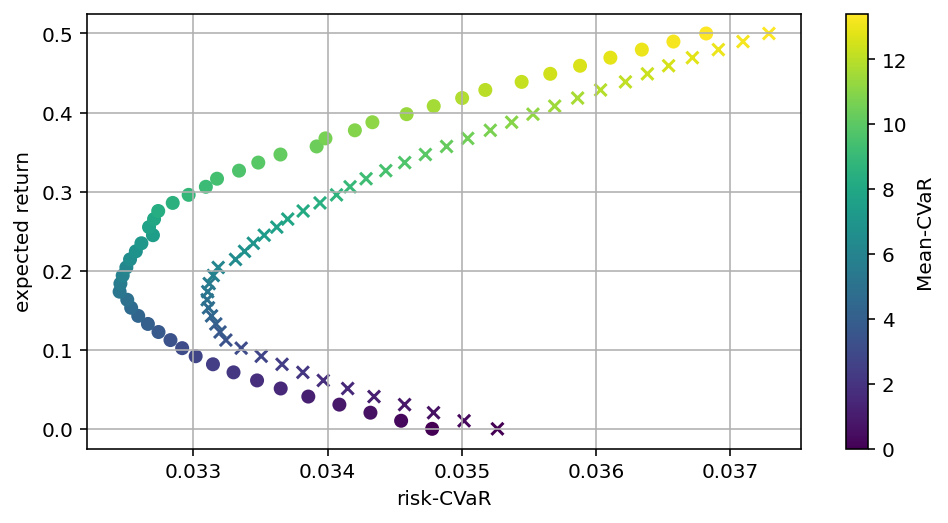

In [151]:
plt.figure(figsize = (8,4))
#Circle: Mean-CVaR Efficient Frointier
plt.scatter(target_CVaR, target_returns, c = target_returns/target_CVaR, marker = 'o')
#Cross: Mean-Variance Efficient Frontier
plt.scatter(target_CVaR_var,target_returns, c = target_returns/target_CVaR_var, marker = 'x')
plt.grid(True)
plt.xlabel('risk-CVaR')
plt.ylabel('expected return')
plt.colorbar(label = 'Mean-CVaR')

##### Conclusions:
At the same portfolio return rate,the CVaR value of Mean-CoVaR model is less than that of Mean-Variance model.

In other words, portfolio A based on the Mean-CoVaR model is less affected by systemic risk diffusion than portfolio B based on the Mean-Variance model.